In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir(r'\data')############adjust

# 降雨 HZY_rain

## 数据处理

### rain_all 未进行缺失值处理

In [8]:
rain=pd.read_csv('HZY_rain.csv',dtype='str',encoding='gbk').dropna()
print(rain.columns)
rain.columns=['date','r']
rain['date']=pd.to_datetime(rain['date'])
rain['r']=pd.to_numeric(rain['r'])
rain_all=pd.DataFrame(pd.date_range(rain.iloc[0][0],rain.iloc[-1][0],freq='1D'))
rain_all.columns=['date']
rain_all=rain_all.merge(rain,how='left',on='date')

Index(['观测日期', '降雨量'], dtype='object')


### rain_all_all 缺失值处理

In [11]:
rain_all_all=rain_all.interpolate()

## 画图

### rain_all（含缺失值）

D:\python\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


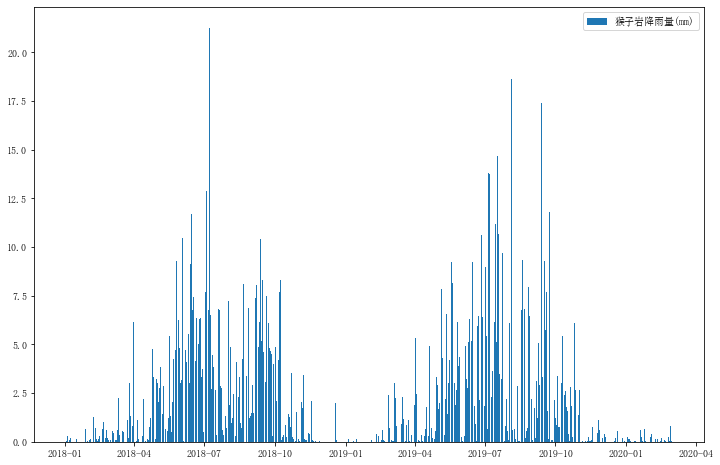

In [13]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(12,8))

plt.bar(rain_all.date,rain_all['r'],label='猴子岩降雨量(mm)')
plt.legend()

plt.savefig(r'\KD\rain(NA).png',bbox_inches='tight',dpi = 1000)############adjust

In [21]:
[np.min(rain_all['r']),np.max(rain_all['r'])]

[0.0, 21.27]

### rain_all_all（已填充缺失值）

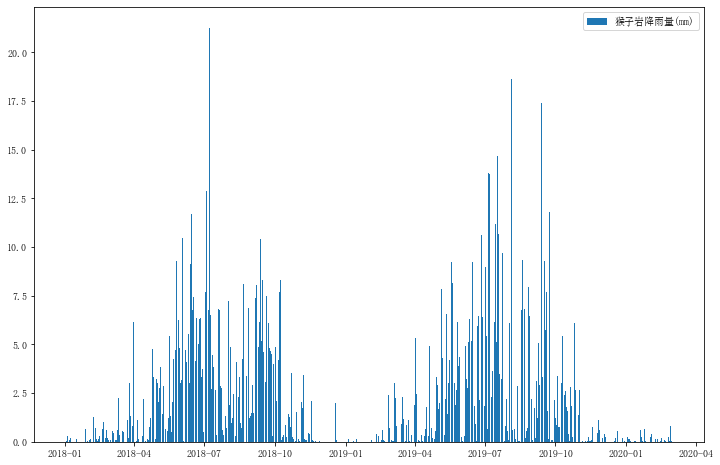

In [14]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(12,8))

plt.bar(rain_all_all.date,rain_all_all['r'],label='猴子岩降雨量(mm)')
plt.legend()

plt.savefig(r'\KD\rain(full).png',bbox_inches='tight',dpi = 1000)############adjust

### 结合KD边坡位移数据 with rian_all

#### KD数据导入

In [15]:
os.chdir(r'\KD_TP3-29_pre_result')############adjust

data_name=os.listdir(r'\KD_TP3-29_pre_result')############adjust
TP10=pd.read_csv(data_name[0],encoding='utf-8')
TP11=pd.read_csv(data_name[1],encoding='utf-8')
TP12=pd.read_csv(data_name[2],encoding='utf-8')
TP13=pd.read_csv(data_name[3],encoding='utf-8')
TP14=pd.read_csv(data_name[4],encoding='utf-8')
TP15=pd.read_csv(data_name[5],encoding='utf-8')
TP18=pd.read_csv(data_name[6],encoding='utf-8')
TP19=pd.read_csv(data_name[7],encoding='utf-8')
TP20=pd.read_csv(data_name[8],encoding='utf-8')
TP21=pd.read_csv(data_name[9],encoding='utf-8')
TP22=pd.read_csv(data_name[10],encoding='utf-8')


#全时间链
date=pd.DataFrame(pd.date_range(TP10.iloc[0][0],TP10.iloc[-1][0],freq='1D'))
date.columns=['date']
date['date']=date['date'].map(lambda x:x.strftime('%Y-%m-%d'))

#others
TP23=pd.read_csv(data_name[11],encoding='utf-8')
TP23=date.merge(TP23,how='left',on='date')

TP25=pd.read_csv(data_name[12],encoding='utf-8')
TP25=date.merge(TP25,how='left',on='date')

TP26=pd.read_csv(data_name[13],encoding='utf-8')
TP26=date.merge(TP26,how='left',on='date')

TP27=pd.read_csv(data_name[14],encoding='utf-8')
TP27=date.merge(TP27,how='left',on='date')

TP28=pd.read_csv(data_name[15],encoding='utf-8')
TP28=date.merge(TP28,how='left',on='date')

TP29=pd.read_csv(data_name[16],encoding='utf-8')
TP29=date.merge(TP29,how='left',on='date')

TP3=pd.read_csv(data_name[17],encoding='utf-8')
TP5=pd.read_csv(data_name[18],encoding='utf-8')
TP8=pd.read_csv(data_name[19],encoding='utf-8')
TP9=pd.read_csv(data_name[20],encoding='utf-8')

#时间转换
TP3['date']=pd.to_datetime(TP3['date'])
TP5['date']=pd.to_datetime(TP5['date'])
TP8['date']=pd.to_datetime(TP8['date'])
TP9['date']=pd.to_datetime(TP9['date'])
TP10['date']=pd.to_datetime(TP10['date'])
TP11['date']=pd.to_datetime(TP11['date'])
TP12['date']=pd.to_datetime(TP12['date'])
TP13['date']=pd.to_datetime(TP13['date'])
TP14['date']=pd.to_datetime(TP14['date'])
TP15['date']=pd.to_datetime(TP15['date'])
TP18['date']=pd.to_datetime(TP18['date'])
TP19['date']=pd.to_datetime(TP19['date'])
TP20['date']=pd.to_datetime(TP20['date'])
TP21['date']=pd.to_datetime(TP21['date'])
TP22['date']=pd.to_datetime(TP22['date'])
TP23['date']=pd.to_datetime(TP23['date'])
TP25['date']=pd.to_datetime(TP25['date'])
TP26['date']=pd.to_datetime(TP26['date'])
TP27['date']=pd.to_datetime(TP27['date'])
TP28['date']=pd.to_datetime(TP28['date'])
TP29['date']=pd.to_datetime(TP29['date'])

#### KD+rain_all

##### 全测点

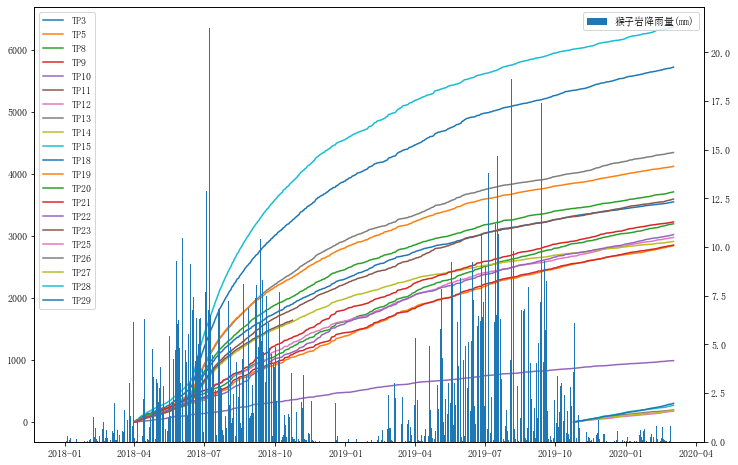

In [31]:
fig, ax1 = plt.subplots(figsize=(12,8))

#左轴
ax1.plot(TP3.date,TP3['sum_xy'],label='TP3')
ax1.plot(TP5.date,TP5['sum_xy'],label='TP5')
ax1.plot(TP8.date,TP8['sum_xy'],label='TP8')
ax1.plot(TP9.date,TP9['sum_xy'],label='TP9')
ax1.plot(TP10.date,TP10['sum_xy'],label='TP10')
ax1.plot(TP11.date,TP11['sum_xy'],label='TP11')
ax1.plot(TP12.date,TP12['sum_xy'],label='TP12')
ax1.plot(TP13.date,TP13['sum_xy'],label='TP13')
ax1.plot(TP14.date,TP14['sum_xy'],label='TP14')
ax1.plot(TP15.date,TP15['sum_xy'],label='TP15')
ax1.plot(TP18.date,TP18['sum_xy'],label='TP18')
ax1.plot(TP19.date,TP19['sum_xy'],label='TP19')
ax1.plot(TP20.date,TP20['sum_xy'],label='TP20')
ax1.plot(TP21.date,TP21['sum_xy'],label='TP21')
ax1.plot(TP22.date,TP22['sum_xy'],label='TP22')
ax1.plot(TP23.date,TP23['sum_xy'],label='TP23')
ax1.plot(TP23.date,TP25['sum_xy'],label='TP25')
ax1.plot(TP23.date,TP26['sum_xy'],label='TP26')
ax1.plot(TP23.date,TP27['sum_xy'],label='TP27')
ax1.plot(TP23.date,TP28['sum_xy'],label='TP28')
ax1.plot(TP23.date,TP29['sum_xy'],label='TP29')
ax1.legend(loc='upper left')

#右轴
ax2 = ax1.twinx()
ax2.bar(rain_all.date,rain_all['r'],label='猴子岩降雨量(mm)')
ax2.legend(loc='upper right')

plt.savefig(r'\KD\KD_xy_rain(NA).png',bbox_inches='tight',dpi = 1000)############adjust

### 结合LB边坡位移数据 with rain_all

#### 导入数据

In [23]:
os.chdir(r'\LB_TP-CX_pre_result')############adjust

data_name=os.listdir(r'\LB_TP-CX_pre_result')############adjust
LB_0_1=pd.read_csv(data_name[0],encoding='utf-8')
LB_0_2=pd.read_csv(data_name[1],encoding='utf-8')
LB_0_3=pd.read_csv(data_name[2],encoding='utf-8')
LB_0_4=pd.read_csv(data_name[3],encoding='utf-8')
LB_1_1=pd.read_csv(data_name[4],encoding='utf-8')
LB_1_2=pd.read_csv(data_name[5],encoding='utf-8')
LB_1_3=pd.read_csv(data_name[6],encoding='utf-8')
LB_1_4=pd.read_csv(data_name[7],encoding='utf-8')
LB_1_5=pd.read_csv(data_name[8],encoding='utf-8')
LB_2_1=pd.read_csv(data_name[9],encoding='utf-8')
LB_2_2=pd.read_csv(data_name[10],encoding='utf-8')
LB_2_3=pd.read_csv(data_name[11],encoding='utf-8')
LB_2_4=pd.read_csv(data_name[12],encoding='utf-8')
LB_2_5=pd.read_csv(data_name[13],encoding='utf-8')
LB_3_1=pd.read_csv(data_name[14],encoding='utf-8')
LB_3_2=pd.read_csv(data_name[15],encoding='utf-8')
LB_3_3=pd.read_csv(data_name[16],encoding='utf-8')
LB_3_4=pd.read_csv(data_name[17],encoding='utf-8')
LB_3_5=pd.read_csv(data_name[18],encoding='utf-8')
LB_CX_1=pd.read_csv(data_name[19],encoding='utf-8')
LB_TP1=pd.read_csv(data_name[20],encoding='utf-8')
LB_TP2=pd.read_csv(data_name[21],encoding='utf-8')
LB_TP3=pd.read_csv(data_name[22],encoding='utf-8')
LB_TP4=pd.read_csv(data_name[23],encoding='utf-8')
LB_TP5=pd.read_csv(data_name[24],encoding='utf-8')
LB_XL_1=pd.read_csv(data_name[25],encoding='utf-8')
LB_XL_2=pd.read_csv(data_name[26],encoding='utf-8')

#时间处理
LB_0_1['date']=pd.to_datetime(LB_0_1['date'])
LB_0_2['date']=pd.to_datetime(LB_0_2['date'])
LB_0_3['date']=pd.to_datetime(LB_0_3['date'])
LB_0_4['date']=pd.to_datetime(LB_0_4['date'])
LB_1_1['date']=pd.to_datetime(LB_1_1['date'])
LB_1_2['date']=pd.to_datetime(LB_1_2['date'])
LB_1_3['date']=pd.to_datetime(LB_1_3['date'])
LB_1_4['date']=pd.to_datetime(LB_1_4['date'])
LB_1_5['date']=pd.to_datetime(LB_1_5['date'])
LB_2_1['date']=pd.to_datetime(LB_2_1['date'])
LB_2_2['date']=pd.to_datetime(LB_2_2['date'])
LB_2_3['date']=pd.to_datetime(LB_2_3['date'])
LB_2_4['date']=pd.to_datetime(LB_2_4['date'])
LB_2_5['date']=pd.to_datetime(LB_2_5['date'])
LB_3_1['date']=pd.to_datetime(LB_3_1['date'])
LB_3_2['date']=pd.to_datetime(LB_3_2['date'])
LB_3_3['date']=pd.to_datetime(LB_3_3['date'])
LB_3_4['date']=pd.to_datetime(LB_3_4['date'])
LB_3_5['date']=pd.to_datetime(LB_3_5['date'])
LB_CX_1['date']=pd.to_datetime(LB_CX_1['date'])
LB_TP1['date']=pd.to_datetime(LB_TP1['date'])
LB_TP2['date']=pd.to_datetime(LB_TP2['date'])
LB_TP3['date']=pd.to_datetime(LB_TP3['date'])
LB_TP4['date']=pd.to_datetime(LB_TP4['date'])
LB_TP5['date']=pd.to_datetime(LB_TP5['date'])
LB_XL_1['date']=pd.to_datetime(LB_XL_1['date'])
LB_XL_2['date']=pd.to_datetime(LB_XL_2['date'])

#### LB+rain_all

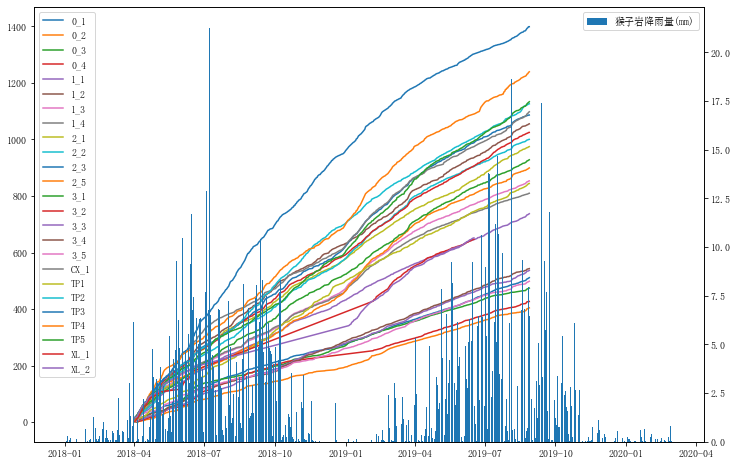

In [30]:
fig, ax1 = plt.subplots(figsize=(12,8))

#左轴
ax1.plot(LB_0_1.date,LB_0_1['sum_xy'],label='0_1')
ax1.plot(LB_0_2.date,LB_0_2['sum_xy'],label='0_2')
ax1.plot(LB_0_3.date,LB_0_3['sum_xy'],label='0_3')
ax1.plot(LB_0_4.date,LB_0_4['sum_xy'],label='0_4')
ax1.plot(LB_1_1.date,LB_1_1['sum_xy'],label='1_1')
ax1.plot(LB_1_2.date,LB_1_2['sum_xy'],label='1_2')
ax1.plot(LB_1_3.date,LB_1_3['sum_xy'],label='1_3')
ax1.plot(LB_1_4.date,LB_1_4['sum_xy'],label='1_4')
ax1.plot(LB_2_1.date,LB_2_1['sum_xy'],label='2_1')
ax1.plot(LB_2_2.date,LB_2_2['sum_xy'],label='2_2')
ax1.plot(LB_2_3.date,LB_2_3['sum_xy'],label='2_3')
ax1.plot(LB_2_5.date,LB_2_5['sum_xy'],label='2_5')
ax1.plot(LB_3_1.date,LB_3_1['sum_xy'],label='3_1')
ax1.plot(LB_3_2.date,LB_3_2['sum_xy'],label='3_2')
ax1.plot(LB_3_3.date,LB_3_3['sum_xy'],label='3_3')
ax1.plot(LB_3_4.date,LB_3_4['sum_xy'],label='3_4')
ax1.plot(LB_3_5.date,LB_3_5['sum_xy'],label='3_5')
ax1.plot(LB_CX_1.date,LB_CX_1['sum_xy'],label='CX_1')
ax1.plot(LB_TP1.date,LB_TP1['sum_xy'],label='TP1')
ax1.plot(LB_TP2.date,LB_TP2['sum_xy'],label='TP2')
ax1.plot(LB_TP3.date,LB_TP3['sum_xy'],label='TP3')
ax1.plot(LB_TP4.date,LB_TP4['sum_xy'],label='TP4')
ax1.plot(LB_TP5.date,LB_TP5['sum_xy'],label='TP5')
ax1.plot(LB_XL_1.date,LB_XL_1['sum_xy'],label='XL_1')
ax1.plot(LB_XL_2.date,LB_XL_2['sum_xy'],label='XL_2')

ax1.legend(loc='upper left')

#右轴
ax2 = ax1.twinx()
ax2.bar(rain_all.date,rain_all['r'],label='猴子岩降雨量(mm)')
ax2.legend(loc='upper right')

plt.savefig(r'\LB\LB_xy_rain(NA).png',bbox_inches='tight',dpi = 1000)############adjust

#### 查看具体内容（XL-2）

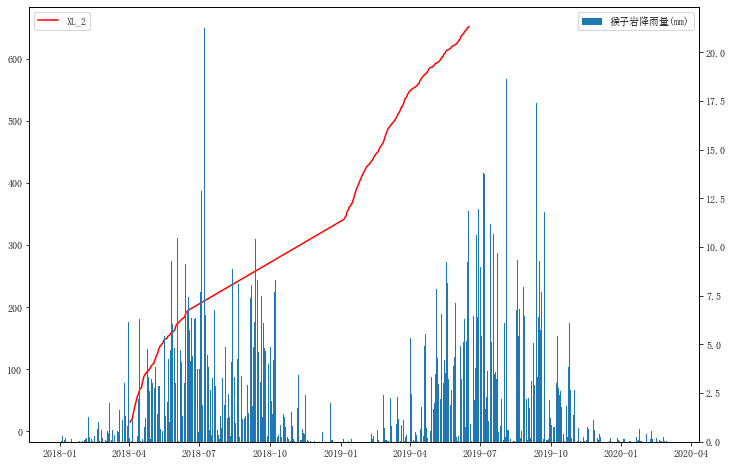

In [29]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12,8))

#plt.plot(LB_0_1.date,LB_0_1['sum_xy'],label='0_1')
#plt.plot(LB_0_2.date,LB_0_2['sum_xy'],label='0_2')
#plt.plot(LB_0_3.date,LB_0_3['sum_xy'],label='0_3')
#plt.plot(LB_0_4.date,LB_0_4['sum_xy'],label='0_4')
#plt.plot(LB_1_1.date,LB_1_1['sum_xy'],label='1_1')
#plt.plot(LB_1_2.date,LB_1_2['sum_xy'],label='1_2')
#plt.plot(LB_1_3.date,LB_1_3['sum_xy'],label='1_3')
#plt.plot(LB_1_4.date,LB_1_4['sum_xy'],label='1_4')
#plt.plot(LB_2_1.date,LB_2_1['sum_xy'],label='2_1')
#plt.plot(LB_2_2.date,LB_2_2['sum_xy'],label='2_2')
#plt.plot(LB_2_3.date,LB_2_3['sum_xy'],label='2_3')
#plt.plot(LB_2_5.date,LB_2_5['sum_xy'],label='2_5')
#plt.plot(LB_3_1.date,LB_3_1['sum_xy'],label='3_1')
#plt.plot(LB_3_2.date,LB_3_2['sum_xy'],label='3_2')
#plt.plot(LB_3_3.date,LB_3_3['sum_xy'],label='3_3')
#plt.plot(LB_3_4.date,LB_3_4['sum_xy'],label='3_4')
#plt.plot(LB_3_5.date,LB_3_5['sum_xy'],label='3_5')
#plt.plot(LB_CX_1.date,LB_CX_1['sum_xy'],label='CX_1')
#plt.plot(LB_TP1.date,LB_TP1['sum_xy'],label='TP1')
#plt.plot(LB_TP2.date,LB_TP2['sum_xy'],label='TP2')
#plt.plot(LB_TP3.date,LB_TP3['sum_xy'],label='TP3')
#plt.plot(LB_TP4.date,LB_TP4['sum_xy'],label='TP4')
#plt.plot(LB_TP5.date,LB_TP5['sum_xy'],label='TP5')
#plt.plot(LB_XL_1.date,LB_XL_1['sum_xy'],label='XL_1')
ax1.plot(LB_XL_2.date,LB_XL_2['sum_xy'],label='XL_2',color='r')

ax1.legend(loc='upper left')

#右轴
ax2 = ax1.twinx()
ax2.bar(rain_all.date,rain_all['r'],label='猴子岩降雨量(mm)')
ax2.legend(loc='upper right')

# 库水位_累计 HZY_water_level.csv

## 数据处理

### water_all：未进行缺失值处理

In [32]:
import os
os.chdir(r'\data')

In [33]:
water=pd.read_csv('HZY_water_level.csv',dtype='str',encoding='gbk').dropna()
print(water.columns)
water.columns=['date','w']
water['date']=pd.to_datetime(water['date'])
water['w']=pd.to_numeric(water['w'])
water_sum_all=pd.DataFrame(pd.date_range(water.iloc[0][0],water.iloc[-1][0],freq='1D'))
water_sum_all.columns=['date']
water_sum_all=water_sum_all.merge(water,how='left',on='date')

Index(['观测日期', '水位(m)'], dtype='object')


#### 库水位区间

In [37]:
[np.min(water_sum_new['w']),np.max(water_sum_new['w'])]

[1803.161076, 1840.8852780000002]

### 画图

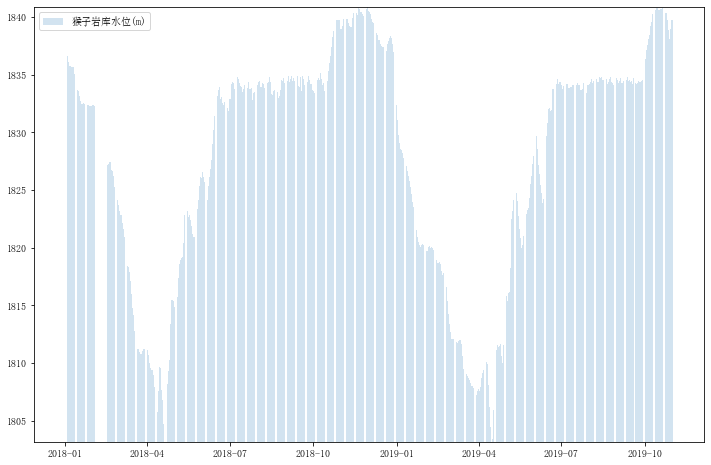

In [36]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(12,8))

water_sum_new=water_sum_all[water_sum_all['date']>='2018-01-01']
plt.bar(water_sum_new.date,water_sum_new['w'],label='猴子岩库水位(m)',alpha=0.2)
plt.ylim((np.min(water_sum_new['w']), np.max(water_sum_new['w'])))
plt.legend()

plt.savefig(r'\KD\water_sum(NA).png',bbox_inches='tight',dpi = 1000)############adjust

### KD+water_new_sum

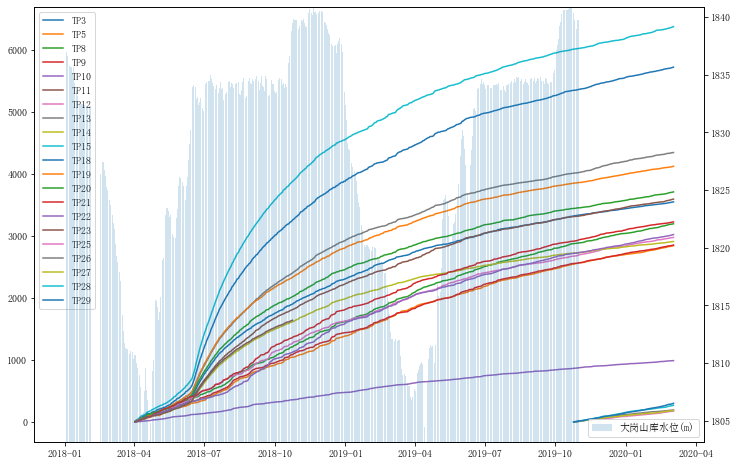

In [39]:
fig, ax1 = plt.subplots(figsize=(12,8))

#左轴
ax1.plot(TP3.date,TP3['sum_xy'],label='TP3')
ax1.plot(TP5.date,TP5['sum_xy'],label='TP5')
ax1.plot(TP8.date,TP8['sum_xy'],label='TP8')
ax1.plot(TP9.date,TP9['sum_xy'],label='TP9')
ax1.plot(TP10.date,TP10['sum_xy'],label='TP10')
ax1.plot(TP11.date,TP11['sum_xy'],label='TP11')
ax1.plot(TP12.date,TP12['sum_xy'],label='TP12')
ax1.plot(TP13.date,TP13['sum_xy'],label='TP13')
ax1.plot(TP14.date,TP14['sum_xy'],label='TP14')
ax1.plot(TP15.date,TP15['sum_xy'],label='TP15')
ax1.plot(TP18.date,TP18['sum_xy'],label='TP18')
ax1.plot(TP19.date,TP19['sum_xy'],label='TP19')
ax1.plot(TP20.date,TP20['sum_xy'],label='TP20')
ax1.plot(TP21.date,TP21['sum_xy'],label='TP21')
ax1.plot(TP22.date,TP22['sum_xy'],label='TP22')
ax1.plot(TP23.date,TP23['sum_xy'],label='TP23')
ax1.plot(TP23.date,TP25['sum_xy'],label='TP25')
ax1.plot(TP23.date,TP26['sum_xy'],label='TP26')
ax1.plot(TP23.date,TP27['sum_xy'],label='TP27')
ax1.plot(TP23.date,TP28['sum_xy'],label='TP28')
ax1.plot(TP23.date,TP29['sum_xy'],label='TP29')
ax1.legend(loc='upper left')

#右轴
ax2 = ax1.twinx()
ax2.bar(water_sum_new.date,water_sum_new['w'],label='大岗山库水位(m)',alpha=0.2)
ax2.set_ylim(np.min(water_sum_new['w']), np.max(water_sum_new['w']))
ax2.legend(loc='lower right')

#图像导出
plt.savefig(r'\KD\KD_xy_water_sum(NA).png',bbox_inches='tight',dpi = 1000)############adjust

### LB+water_new_sum

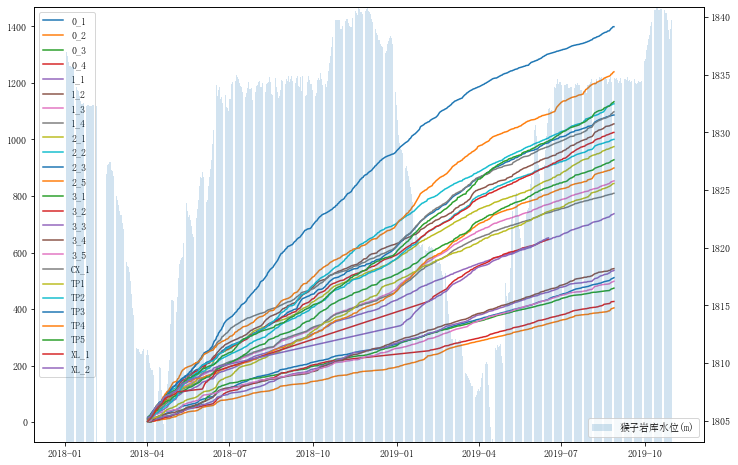

In [40]:
fig, ax1 = plt.subplots(figsize=(12,8))

#左轴
ax1.plot(LB_0_1.date,LB_0_1['sum_xy'],label='0_1')
ax1.plot(LB_0_2.date,LB_0_2['sum_xy'],label='0_2')
ax1.plot(LB_0_3.date,LB_0_3['sum_xy'],label='0_3')
ax1.plot(LB_0_4.date,LB_0_4['sum_xy'],label='0_4')
ax1.plot(LB_1_1.date,LB_1_1['sum_xy'],label='1_1')
ax1.plot(LB_1_2.date,LB_1_2['sum_xy'],label='1_2')
ax1.plot(LB_1_3.date,LB_1_3['sum_xy'],label='1_3')
ax1.plot(LB_1_4.date,LB_1_4['sum_xy'],label='1_4')
ax1.plot(LB_2_1.date,LB_2_1['sum_xy'],label='2_1')
ax1.plot(LB_2_2.date,LB_2_2['sum_xy'],label='2_2')
ax1.plot(LB_2_3.date,LB_2_3['sum_xy'],label='2_3')
ax1.plot(LB_2_5.date,LB_2_5['sum_xy'],label='2_5')
ax1.plot(LB_3_1.date,LB_3_1['sum_xy'],label='3_1')
ax1.plot(LB_3_2.date,LB_3_2['sum_xy'],label='3_2')
ax1.plot(LB_3_3.date,LB_3_3['sum_xy'],label='3_3')
ax1.plot(LB_3_4.date,LB_3_4['sum_xy'],label='3_4')
ax1.plot(LB_3_5.date,LB_3_5['sum_xy'],label='3_5')
ax1.plot(LB_CX_1.date,LB_CX_1['sum_xy'],label='CX_1')
ax1.plot(LB_TP1.date,LB_TP1['sum_xy'],label='TP1')
ax1.plot(LB_TP2.date,LB_TP2['sum_xy'],label='TP2')
ax1.plot(LB_TP3.date,LB_TP3['sum_xy'],label='TP3')
ax1.plot(LB_TP4.date,LB_TP4['sum_xy'],label='TP4')
ax1.plot(LB_TP5.date,LB_TP5['sum_xy'],label='TP5')
ax1.plot(LB_XL_1.date,LB_XL_1['sum_xy'],label='XL_1')
ax1.plot(LB_XL_2.date,LB_XL_2['sum_xy'],label='XL_2')

ax1.legend(loc='upper left')


#右轴
ax2 = ax1.twinx()
ax2.bar(water_sum_new.date,water_sum_new['w'],label='猴子岩库水位(m)',alpha=0.2)
ax2.set_ylim(np.min(water_sum_new['w']), np.max(water_sum_new['w']))
ax2.legend(loc='lower right')

#图像导出
plt.savefig(r'\LB\LB_xy_water_sum(NA).png',bbox_inches='tight',dpi = 1000)############adjust